In [1]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt

loading specpolFlow package
importing specpolFlow.iolsd


In [2]:
import pyRaven as rav

In [3]:
Packet = rav.data.read_packet('Packet_test.h5')

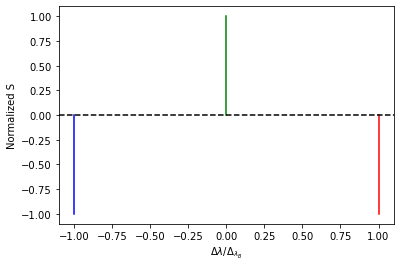

In [10]:
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':50.0,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':0.98,          # the line strength parameter
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    'Bpole':1000,
    'incl':30*np.pi/180, #not necessary for loop
    'beta':30*np.pi/180, #not necessary for loop
    'phase':90*np.pi/180 #not necessary for loop
  }

unnoparam = {
    'down':[0, 0, 0],   # the s, j, l of the lower level
    'up':[0, 1, 1],    # the s, j, l of the upper level
    }

weakparam = {
        'geff':1.0
    }

gridparam = {
        'Bgrid': np.array([1000, 2000]),
        'igrid': np.array([30,60]),
        'betagrid':np.array([30]),
        'phasegrid':np.array([90])
        }
    
param={'general' : genparam,
       'weak' : weakparam,
       'grid' : gridparam,
       'unno': unnoparam # no necessary for loop
       }

pat = rav.pattern.zeeman_pattern(unnoparam['down'], unnoparam['up'])
rav.pattern.plot_zeeman_pattern(pat)

Max velocity needed: 20.0 vdop
Max velocity needed: 20.0 vdop
Evaluating with unno method...
Max shift due to field: 0.06998 vdop
Max shift due to vsini: 5.0 vdop
Max velocity needed: 20.0 vdop
Number of grid points: 4201


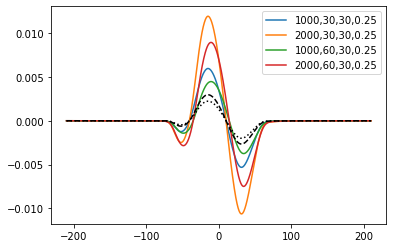

In [11]:
fig, ax = plt.subplots(1,1)

rav.loop.loop(param, Packet, ax)

ax.legend(loc=0)

model, ROT, LOS, MAG = rav.diskint.numerical(param, False)
ax.plot(model['vel'], model['V'], ls='--', c='k')
model, ROT, LOS, MAG = rav.diskint.numerical(param, True)
ax.plot(model['vel'], model['V'], ls='dotted', c='k')


In [8]:
model = rav.diskint.numerical(param, False)

Max velocity needed: 20.0 vdop


In [9]:
model

(array([(4996.497577  , -210. , -21.  , 0.4999558 , 0., 0., 0.,  1.21849566e-08),
        (4996.49924482, -209.9, -20.99, 0.4999558 , 0., 0., 0.,  1.21736952e-08),
        (4996.50091264, -209.8, -20.98, 0.49995579, 0., 0., 0.,  1.21628716e-08),
        ...,
        (5003.49908736,  209.8,  20.98, 0.49995579, 0., 0., 0., -9.46057627e-09),
        (5003.50075518,  209.9,  20.99, 0.4999558 , 0., 0., 0., -9.46666503e-09),
        (5003.502423  ,  210. ,  21.  , 0.4999558 , 0., 0., 0., -9.47319155e-09)],
       dtype=[('wave', '<f8'), ('vel', '<f8'), ('vdop', '<f8'), ('flux', '<f8'), ('fluxnorm', '<f8'), ('Q', '<f8'), ('U', '<f8'), ('V', '<f8')]),
 array([[ 1.96299079e-02, -3.92598158e-02,  1.96299079e-02, ...,
          1.96299079e-02, -3.92598158e-02,  1.96299079e-02],
        [ 3.39999978e-02,  4.80794077e-18, -3.39999978e-02, ...,
          3.39999978e-02,  4.80794077e-18, -3.39999978e-02],
        [ 9.99229036e-01,  9.99229036e-01,  9.99229036e-01, ...,
         -9.99229036e-01, -9.99